# LAB 1: Linear Regression By Hand

## Note

*This activity is intended as a lab-type activity for students to reinforce content from the teaching demonstration lecture. It could take place during a scheduled lab period, or during a scheduled lecture period under a flipped format. It is intended that most students can complete most of the assignment in a 75 minute period.* 

## Instructions

*Before Lab* 

1. Clone [this repository](https://github.com/PhilChodrow/linear-regression-demo).  
2. Open `lab-1.ipynb` and `lab1/LinearRegression.py` in JupyterLab or your IDE of choice.  
3. Identify your pairs (Phase 1) and 3-person groups (Phase 2). 

*In Lab: Phase 1*

1. Find your pairs for this week from the spreadsheet posted online. 
2. Work on Phase 1 in `lab1/LinearRegression.py` as a pair for 20 minutes, swapping Driver and Navigator roles every 5 minutes or 2 lines of code. 

*In Lab: Phase 2*

1. Find your 3-person groups for this week. 
2. Work on Phase 2 as a 3-person group for 30 minutes, 
3. Once you have a solution in which you can no longer identify errors just be reading the code, try running the cells in this notebook and studying the output. 
4. If you encounter errors or unexpected behavior, you may need to do some troubleshooting in `lab1/LinearRegression.py`. You can then restart the kernel of this notebook and run the cells again. 

In [32]:
from lab1.LinearRegressionSol import LinearRegression1D # replace with lab1.LinearRegression for students

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(1234)

Our data for this activity comes from the Palmer Penguins data set. This data set contains a range of physiological measurements of three distinct species of penguin. 

The Palmer Penguins data set was collected by collected by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the [Palmer Station, Antarctica LTER](https://pal.lternet.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/). 

We'll focus today on modeling the relationship between culmen length and culmen depth in Gentoo penguins. 

In [34]:
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)
gentoos = penguins[penguins["Species"].str.contains("Gentoo")]

x = gentoos["Culmen Length (mm)"]
y = gentoos["Culmen Depth (mm)"]

# we split the data into subsets for fitting the model and 
# evaluating or "testing" the model. More on this next week! 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

The *culmen* is the ridge along the bill of the penguin. 

<image src="https://pbs.twimg.com/media/EaAXQn8U4AAoKUj?format=jpg&name=4096x4096" width=200 alt="Cartoon illustration of the length and depth of a penguin's culmen. The depth reflects corresponds the maximum vertical depth of the culmen.">

Here's how our data looks: 

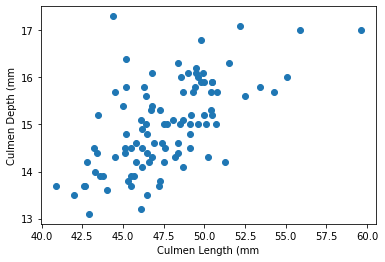

In [4]:
def show_data(x,y):
    plt.scatter(x, y)
    plt.xlabel("Culmen Length (mm")
    plt.ylabel("Culmen Depth (mm")

show_data(x_train, y_train)

There does appear to be a relationship between the culmen length and depth: penguins with longer culmens also tend to have deeper ones as well. We'll try to model this relationship using linear regression. 

In [16]:
LR = LinearRegression1D(learning_rate = 0.00002, max_iter = 1000, tol = 0.01)

The above line *creates* a model but doesn't *fit* or *train* the model. As a result, our current model is, to use the technical term, very bad. 

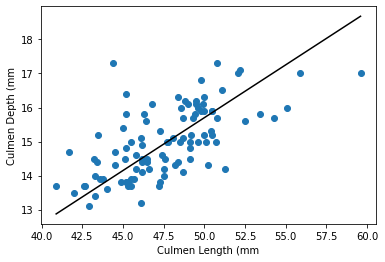

In [35]:
def show_model(x, model):
    x_grid = np.linspace(x.min(), x.max(), 1001)
    y_grid = model.predict(x_grid)
    plt.plot(x_grid, y_grid, color = "black")

show_data(x_train, y_train)
show_model(x_train, LR)

The poor model fit is expressed in part by the very high mean-square error (MSE):

In [36]:
LR.mse(x_train, y_train)

AttributeError: 'LinearRegression1D' object has no attribute 'mse'

In [18]:
LR.fit(x_train, y_train)

/Users/philchodrow/Documents/teaching/demos/linear-regression-demo/lab1/LinearRegressionSol.py:164: UserWarning: Maximum number of iterations reached, model fit may be poor.
  warnings.warn("Maximum number of iterations reached, model fit may be poor.")


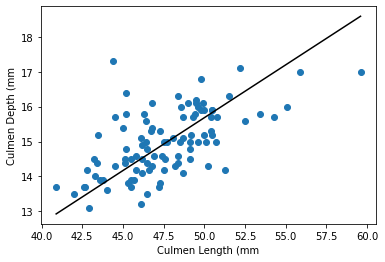

In [19]:
show_data(x_train, y_train)
show_model(x_train, LR)

In [20]:
LR.mse(x_train, y_train)

0.6980113635582199

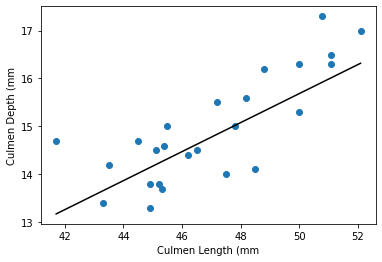

In [21]:
show_data(x_test, y_test)
show_model(x_test, LR)

In [22]:
LR.mse(x_test, y_test)

0.47460132391150156